In [1]:
ls

Case Study - healthcare Industry.docx  health care diabetes.csv
Healthcare Project.ipynb


### Tableau - Daibetic Dashboard

https://public.tableau.com/views/DiabeticDashboard_16258614305610/DiabeticDashboard?:language=en-US&:display_count=n&:origin=viz_share_link

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import style 
import seaborn as sns

In [3]:
df = pd.read_csv("health care diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df2 = pd.read_csv("train.csv")
df2.head()

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
#create graph for data types
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [40]:
datatypes = df.dtypes.values
(unique, counts)  = np.unique(datatypes, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[dtype('int64') 7]
 [dtype('float64') 2]]


In [46]:
print(unique, counts)

[dtype('int64') dtype('float64')] [7 2]


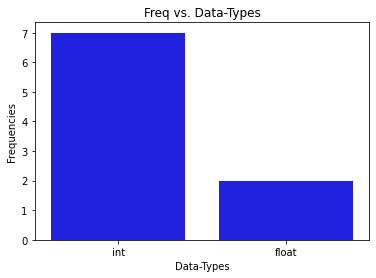

In [59]:
ax = sns.barplot(x= ['int', 'float'], y = counts, color = 'b', label ='datatypes');
#sns.title("Freq vs Data-types")
ax.set(title = 'Freq vs. Data-Types', xlabel="Data-Types", ylabel = "Frequencies");



In [6]:
df.shape

(768, 9)

In [9]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df[df == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [60]:
df_indep = df.iloc[:,:-1]
outcome = df.iloc[:,-1]

In [61]:
df_indep.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [62]:
outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [63]:
zero_val_df = df_indep[(df_indep == 0).any(axis=1)]
print(zero_val_df.shape)
zero_val_df.head()

(432, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30


### Replacing missing values with the median

In [108]:
nonzero_median= df_indep[ df_indep != 0 ].median()
nonzero_median

Pregnancies                   4.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [109]:
nonzero_median['Pregnancies']

4.0

In [110]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

#### Replace trivial value:- 0 with the median since data are a bit skewed

In [111]:
def median_replace(df):
    df2 = df.copy()
    for c in df.columns:
        df2 = df.replace(0,nonzero_median[c])
    return df2

In [113]:
df2 = median_replace(df_indep)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,29.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,29.0,26.6,0.351,31
2,8.0,183.0,64.0,29.0,29.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,29.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [114]:
df2[df2 == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [116]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,8.036458,9.121302,1.000,2.00000,5.0000,9.00000,29.00
Glucose,768.0,121.083333,31.336643,29.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,70.427083,15.112094,24.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,93.921875,105.993883,14.000,29.00000,30.5000,127.25000,846.00
BMI,768.0,32.407943,6.887430,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


### All zeros are removed and replaced with the median

In [119]:
df2['Outcome'] = outcome
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,29.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,29.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,29.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,29.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [120]:
Positive = df2[df2['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,29.0,33.6,0.627,50,1
2,8.0,183.0,64.0,29.0,29.0,23.3,0.672,32,1
4,29.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1


In [66]:
def values_hist(att, df):
    for a in att:
        print(a)
        print("freq  ", a)
        print(df[a].value_counts().head())
        plt.hist(df[a], label = att);
        plt.show()

Pregnancies
freq   Pregnancies
1    135
0    111
2    103
3     75
4     68
Name: Pregnancies, dtype: int64


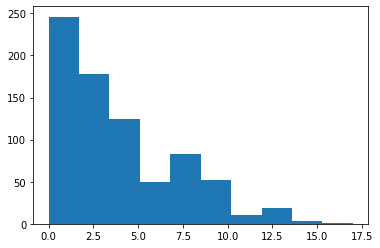

Glucose
freq   Glucose
99     17
100    17
129    14
125    14
106    14
Name: Glucose, dtype: int64


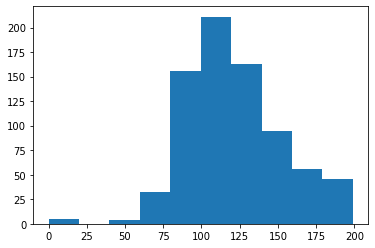

BloodPressure
freq   BloodPressure
70    57
74    52
78    45
68    45
72    44
Name: BloodPressure, dtype: int64


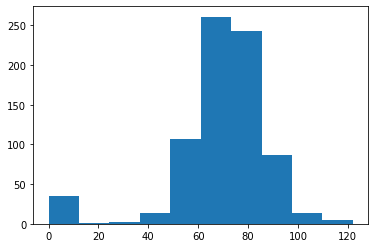

SkinThickness
freq   SkinThickness
0     227
32     31
30     27
27     23
23     22
Name: SkinThickness, dtype: int64


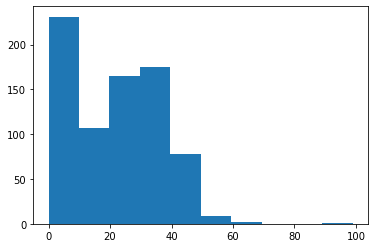

Insulin
freq   Insulin
0      374
105     11
140      9
130      9
120      8
Name: Insulin, dtype: int64


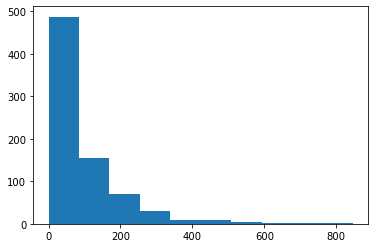

BMI
freq   BMI
32.0    13
31.2    12
31.6    12
0.0     11
33.3    10
Name: BMI, dtype: int64


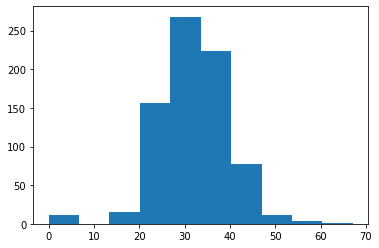

DiabetesPedigreeFunction
freq   DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.261    5
0.207    5
Name: DiabetesPedigreeFunction, dtype: int64


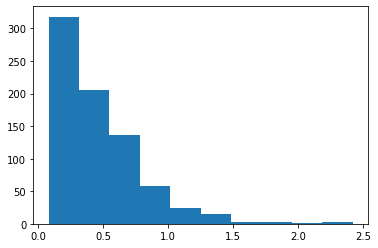

Age
freq   Age
22    72
21    63
25    48
24    46
23    38
Name: Age, dtype: int64


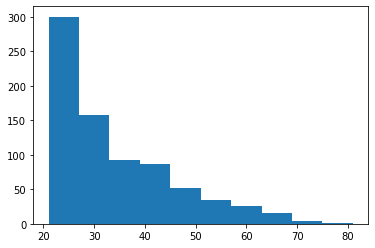

In [67]:
values_hist(df_indep.columns, df)

In [186]:
o = df2.Outcome.value_counts()

<AxesSubplot:>

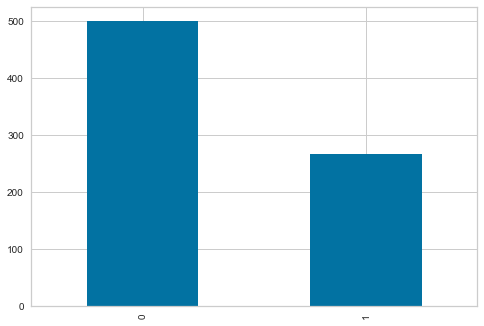

In [187]:
o.plot.bar()

In [204]:
pos_out = df2[df2.Outcome == 1].count()[0]/outcome.shape[0] *100
neg_out = df2[df2.Outcome == 0].count()[0]/outcome.shape[0] *100

print("positive_outcome:(has diabetes) {0}%".format(round(pos_out,2)))
print("negative_outcome: {0}%".format(round(neg_out,2)))


positive_outcome:(has diabetes) 34.9%
negative_outcome: 65.1%


##### Since outcome class is a bit uneven, accuracy will not be used as a metric to compare and determine which model is the best.
#### F1-score will be used instead:- average='weighted' to mitigate the class imbalance

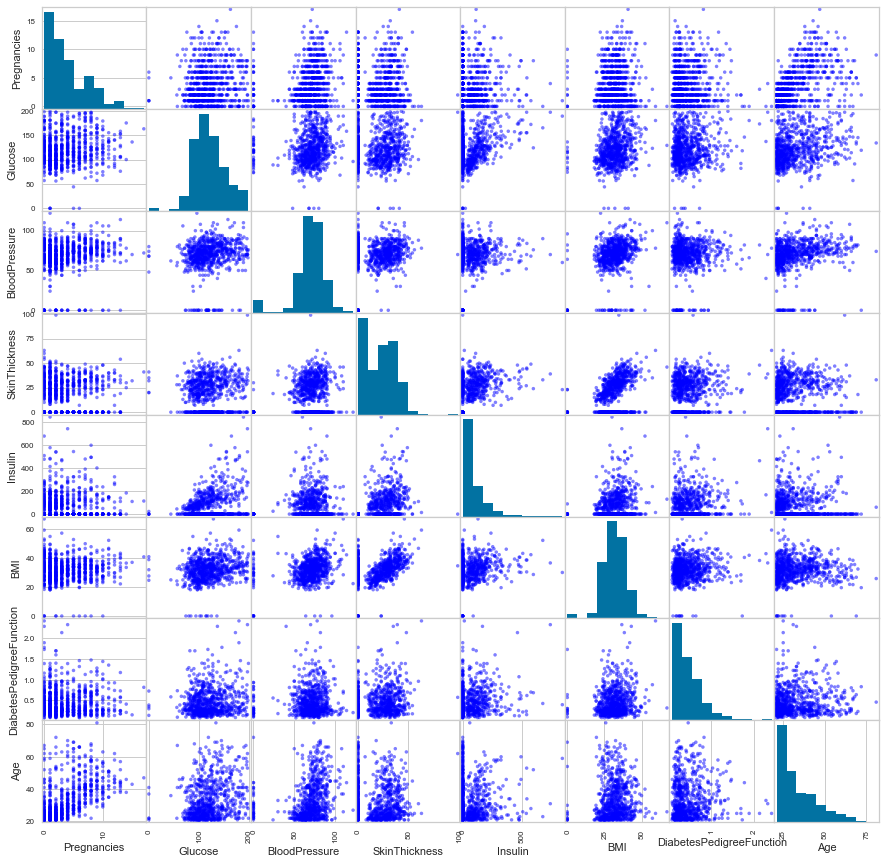

In [207]:
import pandas.plotting as plt2
plt2.scatter_matrix(df_indep, figsize = (15,15), color = 'blue')
plt.show()

In [122]:
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.076246,0.044635,0.109895,-0.012851,0.186000,0.055609,-0.019468,0.075591
Glucose,0.076246,1.000000,0.189630,0.186069,0.357499,0.226583,0.138455,0.266482,0.476696
BloodPressure,0.044635,0.189630,1.000000,0.157308,0.055803,0.240720,0.030798,0.287978,0.103203
SkinThickness,0.109895,0.186069,0.157308,1.000000,0.126742,0.543176,0.102188,0.126107,0.214873
Insulin,-0.012851,0.357499,0.055803,0.126742,1.000000,0.192055,0.178457,-0.016848,0.147542
BMI,0.186000,0.226583,0.240720,0.543176,0.192055,1.000000,0.153965,0.027179,0.313891
DiabetesPedigreeFunction,0.055609,0.138455,0.030798,0.102188,0.178457,0.153965,1.000000,0.033561,0.173844
Age,-0.019468,0.266482,0.287978,0.126107,-0.016848,0.027179,0.033561,1.000000,0.238356
Outcome,0.075591,0.476696,0.103203,0.214873,0.147542,0.313891,0.173844,0.238356,1.000000


In [96]:
?sns.heatmap

<AxesSubplot:>

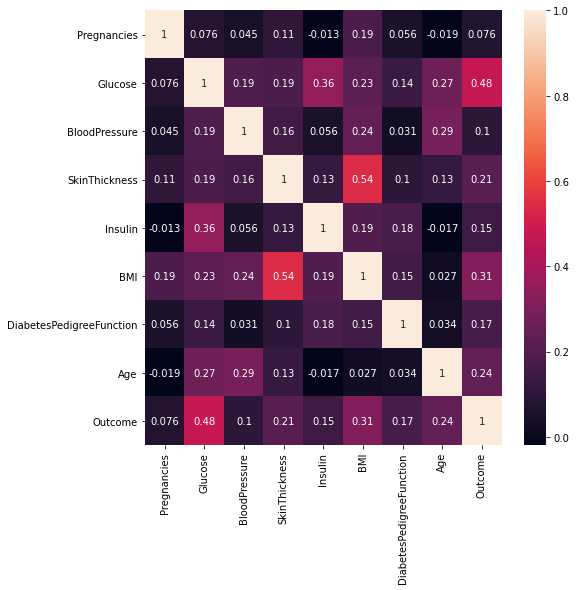

In [123]:
#correlation heat map
plt.subplots(figsize=(8,8))
sns.heatmap(df2.corr(),annot=True)

In [124]:
df2.columns[0:-1]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Pregnancies
freq   Pregnancies
29.0    38
1.0     29
3.0     27
7.0     25
4.0     23
Name: Pregnancies, dtype: int64


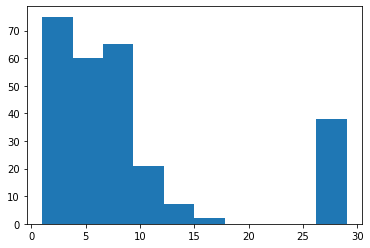

Glucose
freq   Glucose
125.0    7
128.0    6
115.0    6
158.0    6
129.0    6
Name: Glucose, dtype: int64


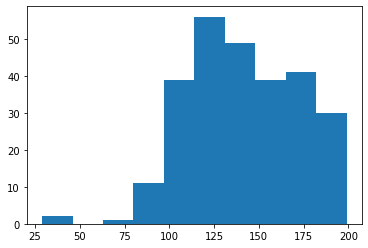

BloodPressure
freq   BloodPressure
70.0    23
76.0    18
74.0    17
78.0    17
72.0    16
Name: BloodPressure, dtype: int64


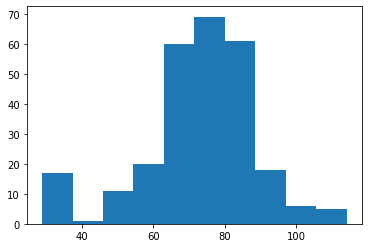

SkinThickness
freq   SkinThickness
29.0    95
32.0    14
30.0     9
33.0     9
39.0     8
Name: SkinThickness, dtype: int64


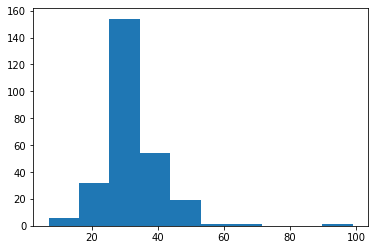

Insulin
freq   Insulin
29.0     139
130.0      6
180.0      4
156.0      3
175.0      3
Name: Insulin, dtype: int64


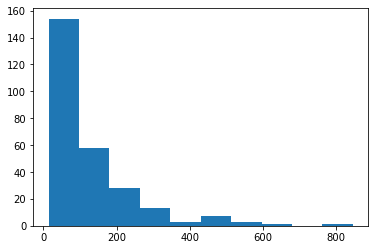

BMI
freq   BMI
32.9    8
31.6    7
33.3    6
31.2    5
32.0    5
Name: BMI, dtype: int64


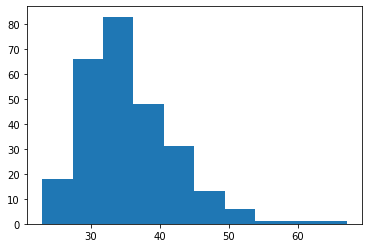

DiabetesPedigreeFunction
freq   DiabetesPedigreeFunction
0.254    4
0.258    3
0.328    2
0.302    2
0.542    2
Name: DiabetesPedigreeFunction, dtype: int64


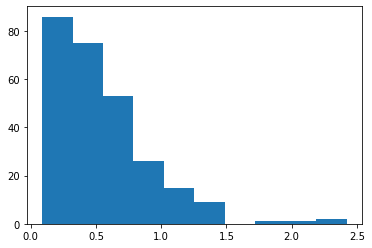

Age
freq   Age
25    14
29    13
41    13
31    13
43    11
Name: Age, dtype: int64


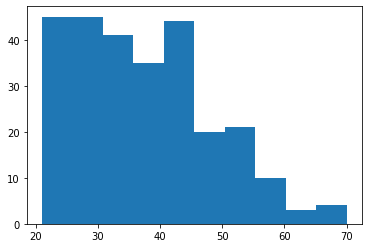

In [125]:
#Finding the effect of each dependent variable when the outcome == 1 -> tested positive for diabetes
values_hist(df2.columns[0:-1], Positive)

In [80]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']
Age = Positive['Age']

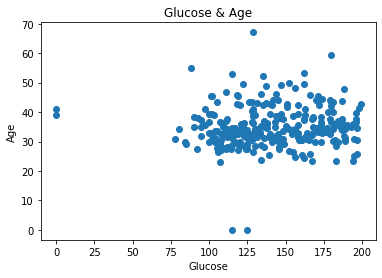

In [78]:
plt.scatter(Glucose, BMI)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose & BMI')
plt.show()

In [84]:
Negative = df[df.Outcome == 0]

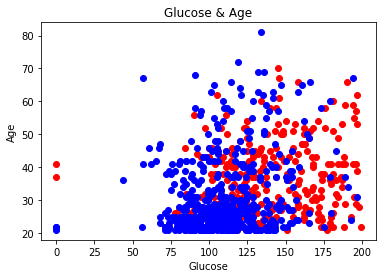

In [87]:
plt.scatter(Glucose, Age, color = 'r', label = Positive)
plt.scatter(Negative.Glucose, Negative.Age, color = 'b', label = Negative)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Glucose & Age')
plt.show()

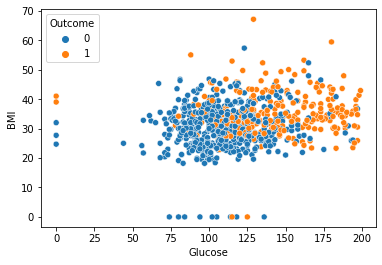

In [77]:
gb = sns.scatterplot(x= "Glucose", y = "BMI", hue = "Outcome", data = df)

##### it is shown in the upper scatter plot that people with high glucose and BMI are more likely to be diabetic

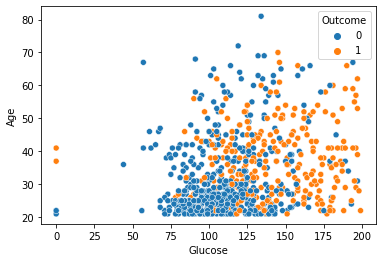

In [88]:
ga = sns.scatterplot(x= "Glucose", y = "Age", hue = "Outcome", data = df)

##### it is shown in the upper scatter plot that older people and with high glucose intake are more likely to be diabetic

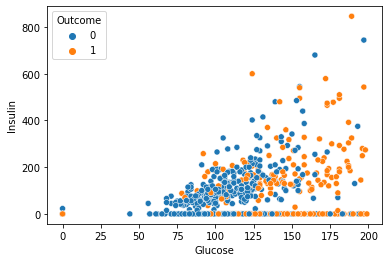

In [89]:
gi = sns.scatterplot(x= "Glucose", y = "Insulin", hue = "Outcome", data = df)

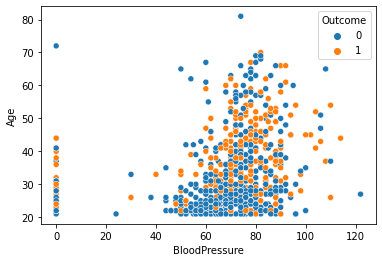

In [91]:
ba = sns.scatterplot(x= "BloodPressure", y = "Age", hue = "Outcome", data = df)

##### it is shown in the upper scatter plot that bloodpressure and age are difficult to determine if one is diabetic

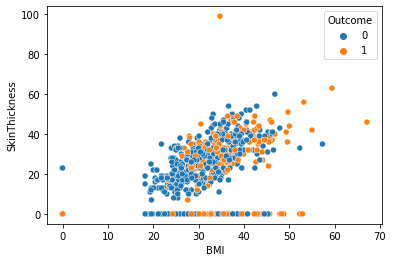

In [93]:
bs = sns.scatterplot(x= "BMI", y = "SkinThickness", hue = "Outcome", data = df)

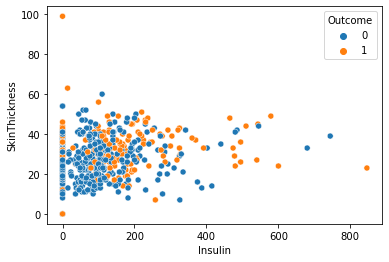

In [94]:
ist = sns.scatterplot(x= "Insulin", y = "SkinThickness", hue = "Outcome", data = df)

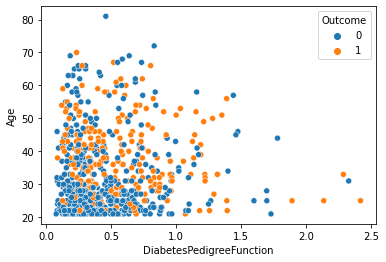

In [99]:
dpa = sns.scatterplot(x= "DiabetesPedigreeFunction", y = "Age", hue = "Outcome", data = df)

##### All combinations are plotted below

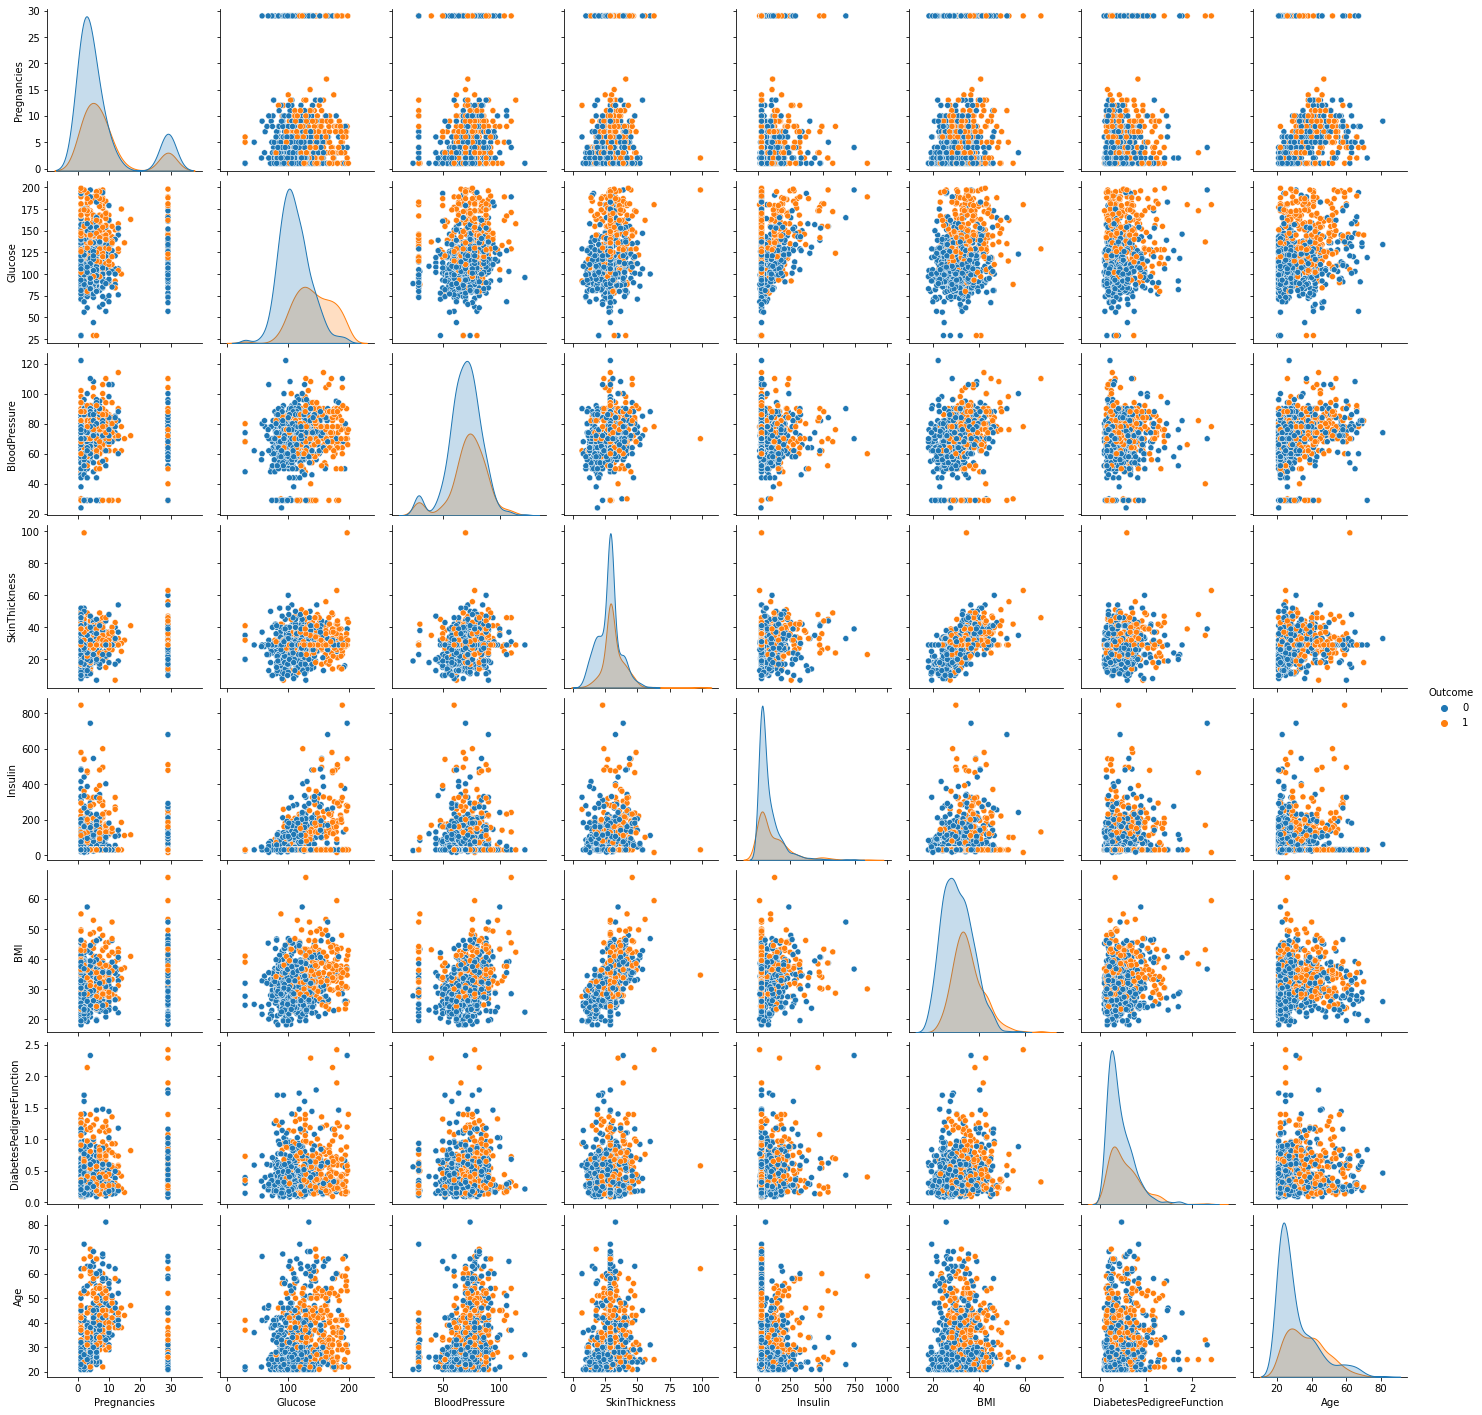

In [127]:
sns.pairplot(df2, hue="Outcome")

#### it is shown in the pairplot that high glucose in all situations (age, DiabeticPedgreeFunc, BMI, Insulin, Skin Thickness, Blood Pressure, Pregnancies) corresponds to an outcome of 1 == daibetic

In [ ]:
#k-fold cv

In [ ]:
#import matplotlib.pyplot as plt
#f, ax = plt.subplots(1,2,figsize=(15,5),)
#df.groupby('dtypes').size().plot.bar(ax=ax[0])
#df.groupby('dtypes').size().plot.pie(ax=ax[1])

## MODLEING

In [275]:
#elbow method - kmeans
#from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs

#from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(1,12))

#visualizer.fit(df_indep)        # Fit the data to the visualizer
#visualizer.show();        # Finalize and render the figure

## Split Dataset

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_indep, outcome, test_size=0.33, random_state=42)

## Scaling Data

In [174]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

## KMM

In [227]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y_train)
print(knn.predict(X_test_scaled))

[0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0]


In [252]:
ypredict4 = knn.predict(X_test_scaled)
f1score = f1_score(y_test, ypredict4, average='weighted')
print("F1 score {0}".format(round(f1score,3)))

F1 score 0.711


In [242]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [269]:
print("KMM:-\nROC_AUC Score", round(roc_auc_score(y_test, ypredict4),3))

KMM:-
ROC_AUC Score 0.667


#### predictions are somewhat random/inaccurate since ROC_AUC_Score is close to 0.5

In [244]:
print("KNN")
print(classification_report(y_test, ypredict4))

KNN
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       168
           1       0.59      0.51      0.55        86

    accuracy                           0.72       254
   macro avg       0.68      0.67      0.67       254
weighted avg       0.71      0.72      0.71       254



In [245]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

### Hyperparameters tuning KMM

In [239]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf3 = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf3.fit(X_scaled, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 13


In [271]:
ypredict5 = best_model.predict(X_test_scaled)

print(roc_auc_score(y_test, ypredict5))

new_f1score = f1_score(y_test, ypredict5, average='weighted')
print("New F1-score {0}".format(round(new_f1score,3)))
print("Old F1 score {0}".format(round(f1score,3)))
print("KMM (new):- ROC_AUC Score", round(roc_auc_score(y_test, ypredict5),3))

0.6753183831672203
New F1-score 0.719
Old F1 score 0.711
KMM (new):- ROC_AUC Score 0.675


In [241]:
print("KNN optimized")
print(classification_report(y_test, ypredict5))

KNN optimized
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       168
           1       0.61      0.52      0.56        86

    accuracy                           0.72       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.72      0.72      0.72       254



### slight improvement when using grid search

In [144]:
#model = KMeans(n_clusters=3, random_state=0)
#model.fit(df_indep)
#y_predict = model.predict(df_indep);
#proj1['cohortindex'] = proj1.apply(lambda row: months(row.invoice_month,row.cohort_month)+1,axis=1)

In [230]:
#plt.scatter(df_indep, outcome, c=y_predict, s=50, cmap='viridis')

#centers = model.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [ ]:
#pd.DataFrame(data.dtypes).reset_index().rename({'index':'var',0:'dtypes'},axis=1)

## Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_scaled, y_train)
ypredict = clf.predict(X_scaled)


ypredict2 = clf.predict(X_test_scaled)

In [172]:
from sklearn.metrics import f1_score
f1_score(y_train, ypredict, average='weighted')

0.7730630815128049

##### so no overfitting since f1 score is similar for training and testing data
##### training :- 0.773
##### testing:- 0.742

In [272]:
f1score_lr = f1_score(y_test, ypredict2, average='weighted')
print("LR F1 score {0}".format(round(f1score_lr,3)))
print("LR :- ROC_AUC Score", round(roc_auc_score(y_test, ypredict2),3))

LR F1 score 0.742
LR :- ROC_AUC Score 0.707


#### ROC_AUC_SCORE is better than KMM, thus LR is a better classifier, 
#### The higher the AUC,the better the performance of the model at distinguishing between the positive and negative classes

In [264]:
print("LR")
print(classification_report(y_test, ypredict2))

LR
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       168
           1       0.63      0.59      0.61        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254



## RandomForest

In [217]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf2 = RandomForestClassifier(max_depth=8, random_state=0)
clf2.fit(X_scaled, y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [273]:
y2_predict = clf2.predict(X_test_scaled)
rf_f1score = f1_score(y_test, y2_predict, average='weighted')
print("RF F1 score {0}".format(round(rf_f1score,3)))
print("RF :- ROC_AUC Score", round(roc_auc_score(y_test, y2_predict),3))

RF F1 score 0.756
RF :- ROC_AUC Score 0.728


In [220]:
clf2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Hypertuning Random Forest Parameters

In [222]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [224]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [225]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [274]:
y3predict = rf_random.predict(X_test_scaled)

rf2_f1score = f1_score(y_test, y3predict, average='weighted')
print("RF (new) :- ROC_AUC Score", round(roc_auc_score(y_test, y3predict),3))

RF (new) :- ROC_AUC Score 0.736


In [260]:
print("Old RF F1 score {0}".format(round(rf_f1score,3)))
print("New RF F1 score {0}".format(round(rf2_f1score,3)))

Old RF F1 score 0.756
New RF F1 score 0.767


### slight improvement in f1-score

In [263]:
print("RF after hypertuning")
print(classification_report(y_test, y3predict))

RF after hypertuning
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       168
           1       0.66      0.64      0.65        86

    accuracy                           0.77       254
   macro avg       0.74      0.74      0.74       254
weighted avg       0.77      0.77      0.77       254



#### Best model in predicting if a person is diabetic is: RANDOM FOREST